In [46]:
# imports

import pandas as pd
import folium
import matplotlib.pyplot as plt

In [17]:
# load dataset

df = pd.read_csv('../data/property_violations.csv')

print(df.columns)

for col in df.columns:
    tot = len(df[col])
    num_na = len(df[col]) - df[col].count()
    print(f"There are {num_na} NaN entries ({num_na/tot * 100}%) in {col}.")

print(df.iloc[0])

Index(['case_no', 'status_dttm', 'status', 'code', 'value', 'description',
       'violation_stno', 'violation_sthigh', 'violation_street',
       'violation_suffix', 'violation_city', 'violation_state',
       'violation_zip', 'ward', 'contact_addr1', 'contact_addr2',
       'contact_city', 'contact_state', 'contact_zip', 'sam_id', 'latitude',
       'longitude', 'location'],
      dtype='object')
There are 0 NaN entries (0.0%) in case_no.
There are 0 NaN entries (0.0%) in status_dttm.
There are 0 NaN entries (0.0%) in status.
There are 0 NaN entries (0.0%) in code.
There are 21707 NaN entries (100.0%) in value.
There are 223 NaN entries (1.0273183765605565%) in description.
There are 0 NaN entries (0.0%) in violation_stno.
There are 16761 NaN entries (77.21472336112775%) in violation_sthigh.
There are 0 NaN entries (0.0%) in violation_street.
There are 159 NaN entries (0.7324826092965403%) in violation_suffix.
There are 1 NaN entries (0.0046068088635002535%) in violation_city.
There 

In [55]:
# top offenders

location_groups = df.groupby(df['location'])
top_locations = list((location_groups.count().nlargest(100, 'case_no')).index)
top_locations = df.loc[df['location'].apply(lambda x: x in top_locations)]

# plot the map using latitude and longitude
map = folium.Map(location=[top_locations.iloc[0].latitude, top_locations.iloc[0].longitude])
for i in range(0,len(top_locations)):
    folium.CircleMarker(
      location=[top_locations.iloc[i]['latitude'], top_locations.iloc[i]['longitude']], radius=5,
      color = 'red'
   ).add_to(map)
map


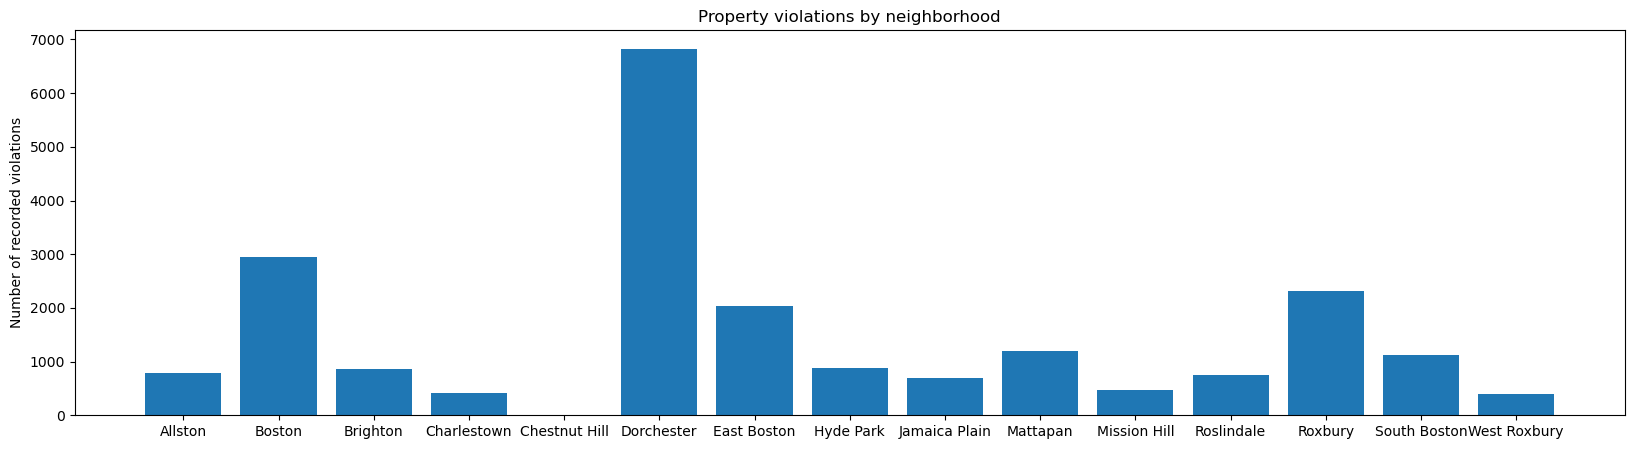

In [69]:
# plot neighborhoods

neigh = df['violation_city'].groupby(df['violation_city']).count()
neigh.drop(['Boston/'], inplace=True)
labels = neigh.keys()

fig, ax = plt.subplots(figsize=(20, 5))

ax.bar(labels, neigh)
ax.set_ylabel("Number of recorded violations")
ax.set_title("Property violations by neighborhood")

plt.show()